In [2]:
%matplotlib inline
import sys
import matplotlib.pyplot as plt
import numpy as np
# add zip executable to python path
# sys.path.append('rffdtd') 
sys.path.append('src') 
sys.path.append('examples')
from rffdtd import simulate, read_touchstone

In [6]:
def plot(freq, sparam, fl=0, fu=1e20, ports=None, mag=True):
    figsize = (10, 7)
    fig, ax = plt.subplots(figsize=figsize)
    i, j = np.argmin(abs(freq - fl)), np.argmin(abs(freq - fu))
    for n in range(sparam.shape[2]):
        for m in range(sparam.shape[1]):
            if np.all(sparam[:,m,n] == 0): continue
            if (ports is None or (m+1,n+1) in ports):
                if mag:
                    d = 20 * np.log10(abs(sparam[:,m,n]))
                else:
                    d = np.angle(sparam[:,m,n], deg=True)
                ax.plot(freq[i:j] / 1e9, d[i:j], label=f'S{m+1}{n+1}')
    plt.xlabel("GHz")
    if mag:
        plt.ylabel("dB")
    else:
        plt.ylabel("Deg")
    plt.legend()
    plt.show()

1296 MHz Interdigital 3-Pole Butterworth Filter, 110 MHz BW
Grid is 94 x 28 x 68 mm in size and composed of 178976 cells.
Each individual simulation needs about 11.198 MiB of memory.
Running 1 simulation(s) on device cuda.
Using GPU: NVIDIA GeForce RTX 3070 Ti
  103851 / 103851 / 1   
FDTD simulation time: 1 min 2.25 sec


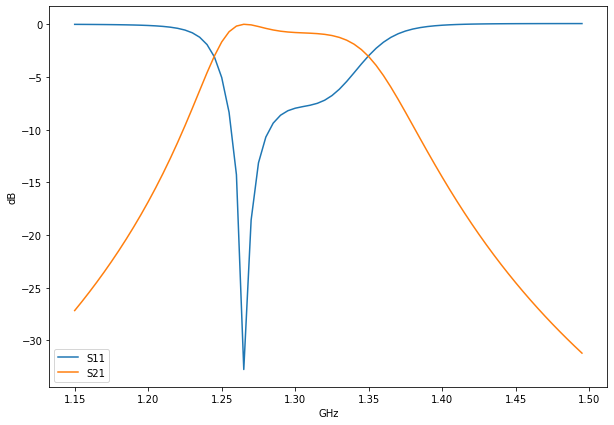

In [9]:
import fisher
fd = fisher.design(port_tuning=False)
freq, sparam = simulate(fd, df=5e6, stop=1, ds=1e-3)
plot(freq, sparam, 1.15e9, 1.5e9)

1296 MHz Interdigital 3-Pole Butterworth Filter, 110 MHz BW
Grid is 94 x 28 x 68 mm in size and composed of 178976 cells.
Each individual simulation needs about 11.843 MiB of memory.
Running 5 simulation(s) on device cuda.
Using GPU: NVIDIA GeForce RTX 3070 Ti
  25963 / 25963 / 5   
FDTD simulation time: 1 min 39.40 sec


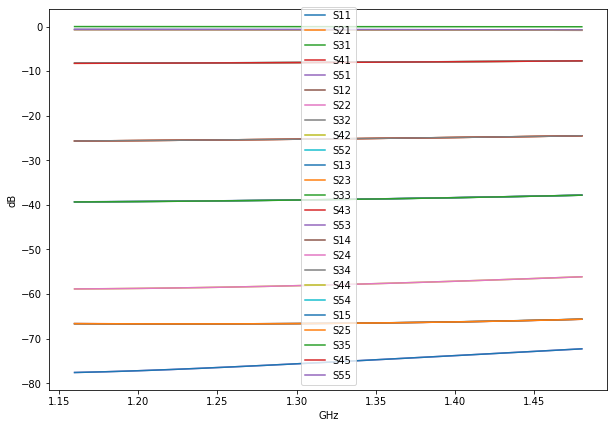

In [10]:
fd = fisher.design(port_tuning=True)
freq, sparam = simulate(fd, df=20e6, ds=1e-3)
plot(freq, sparam, 1.15e9, 1.5e9)

Microstrip Lowpass Filter.
The Finite-Differnce Time-Domain Method for Electromagnetics with 
MATLAB Simulations, Elsherbeni and Demir.  Section 6.2.
Reproduced from Application of the Three-Dimensional Finite-Difference
Time-Domain Method to the Analysis of Planar Microstrip Circuits,
David Sheen, Sami Ali, IEEE MTT Vol 38, No 7, July 1990, p.849.
Grid is 27.456 x 24.552 x 9.504 mm in size and composed of 348192 cells.
Each individual simulation needs about 18.119 MiB of memory.
Running 2 simulation(s) on device cuda.
Using GPU: NVIDIA GeForce RTX 3070 Ti
  9834 / 9834 / 2   
FDTD simulation time: 0 min 11.18 sec


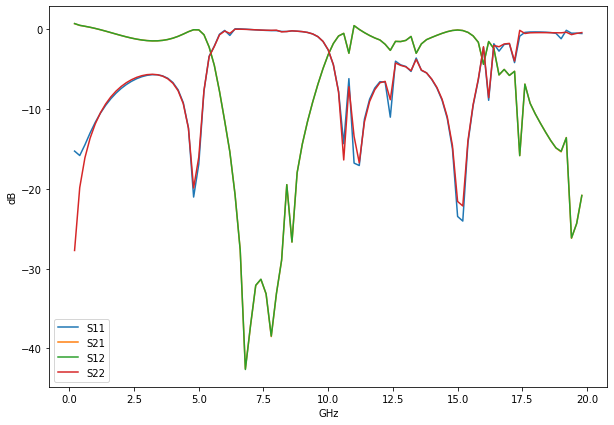

In [3]:
freq, sparam = simulate("examples/lowpass.zip", df=200e6, ds=.264e-3)
plot(freq, sparam, fu=20e9)

Microstrip Microwave Four Port Coupler.
The Finite-Differnce Time-Domain Method for Electromagnetics with 
MATLAB Simulations, Elsherbeni and Demir.  Section 6.2.
Reproduced from Application of the Three-Dimensional Finite-Difference
Time-Domain Method to the Analysis of Planar Microstrip Circuits,
David Sheen, Sami Ali, IEEE MTT Vol 38, No 7, July 1990, p.849.
Grid is 21.384 x 41.448 x 9.504 mm in size and composed of 457812 cells.
Each individual simulation needs about 26.871 MiB of memory.
Running 4 simulation(s) on device cuda.
Using GPU: NVIDIA GeForce RTX 3070 Ti
  19669 / 19669 / 4   
FDTD simulation time: 0 min 56.29 sec


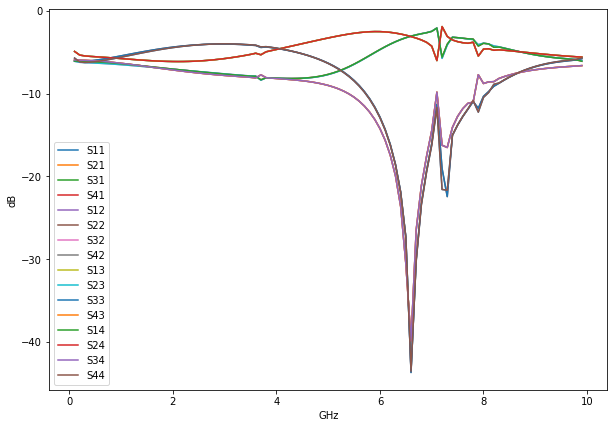

In [4]:
freq, sparam = simulate("examples/coupler.zip", df=100e6, ds=.264e-3)
plot(freq, sparam, fu=10e9)